<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/tensorflow_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="#113D68" size=5>Redes neuronales y deep learning</font></h1>



<h1><font color="#113D68" size=6>Actividad Semana 2</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Pedro Sergey Toledo Bordón</font><br>
<font size=3>Semana 2: Frameworks de Deep Learning: TensorFlow</font><br>
<font size=3>IEBS</font>
</div>

---


In [ ]:
# importamos algunas de las librerias necesarias

import tensorflow as tf
import numpy as np
import pandas as pd

# Para mostrar gráficas

import matplotlib.pyplot as plt
%matplotlib inline

En esta actividad vamos a seguir familiarizándonos con la herramienta *TensorFlow*, para ello vamos a utilizar un dataset donde tendréis que relizar todos los pasos (cargar datos, crear arquitectura de la red, etc.) vosotros mismos para prácticar con la sintásis de *TensorFlow*. Tenéis ejercicios obligatorios y un ejercicio opcional.

# <font color="#004D7F" size=5>Ejercicio</font>
Usando los datos sobre casas y sus precios realiza los ejercicios que se indican.

La información de los datos podéis verla en este enlace:

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data

## <font color="#004D7F" size=4>Ejercicio 1</font>
Carga los datos como hemos visto en el notebook de los ejercicios donde tengas los conjuntos de train y test:

In [ ]:
# importamos el dataset

data = tf.keras.datasets.boston_housing

# cargamos los datos

(x_train, y_train), (x_test, y_test) = data.load_data()

Explora los tamaños de cada conjunto:

In [ ]:
# vemos el tamaño de cada conjunto

print("El tamaño de los conjuntos de entrenamiento son: ")
for i in [x_train, y_train]:
   print (i.shape)

print("\nEl tamaño de los conjuntos de test son: ")
for i in [x_test, y_test]:
   print (i.shape)

data_total_size = x_test.shape[0] + x_train.shape[0]

print(f'\nEl tamaño total de los datos es de: {data_total_size} observaciones.')
print(f"Divididas en un {round(x_train.shape[0] / data_total_size * 100, 2)}% para el conjunto de entrenamiento",
      f"y un {round(x_test.shape[0] / data_total_size * 100, 2)}% para el conjunto de test.")


El tamaño de los conjuntos de entrenamiento son: 
(404, 13)
(404,)

El tamaño de los conjuntos de test son: 
(102, 13)
(102,)

El tamaño total de los datos es de: 506 observaciones.
Divididas en un 79.84% para el conjunto de entrenamiento y un 20.16% para el conjunto de test.


Podemos ver que tenemos un total de 506 observaciones, el 80 % pertenecen al conjunto de entrenamiento, mientras que el resto pertenecen al de test.

Vamos a hacernos una idea de como son los datos con los que estamos trabajando.

Para ello, vamos a necesitar crear un dataset, ya que actualmente solo disponemos de los datos en formato array.

Debido a que el dataset boston no está disponible actualmente en scikit-learn, procederemos a importar de manera manual las columnas desde [la fuente original de datos](http://lib.stat.cmu.edu/datasets/boston).

In [ ]:
# creamos las columnas 

columns =  ["CRIM", "ZN", "INDUS", "CHAS", "NOW", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

target = ["MEDV"]

# constrimos nuestro dataset

features_dataset_train = pd.DataFrame(data = x_train,
                                      columns = columns)

features_dataset_test = pd.DataFrame(data = x_test,
                                      columns = columns)

target_dataset_train = pd.DataFrame(data = y_train,
                                      columns = target)

target_dataset_test = pd.DataFrame(data = y_test,
                                      columns = target)

features_dataset = pd.concat([features_dataset_train, features_dataset_test],
                            ignore_index = True)

target_dataset = pd.concat([target_dataset_train, target_dataset_test],
                            ignore_index = True)

dataset = pd.concat([features_dataset, target_dataset],
                    axis = 1)

Cada una de las columnas corresponden a:

- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 dollars
- PTRATIO  pupil-teacher ratio by town
- B        1000 (Bk - 0.63) ^ 2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

Por lo que podemos decir que nos encontramos ante un conjunto de datos donde tenemos 13 variables que corresponden a datos relacionados con las propiedades más la variable objetivo (MEDV).

## <font color="#004D7F" size=4>Ejercicio 2</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
    - Tipo de entrenamiento:
        - *Epochs*: 100
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# creamos la arquitectura de red

neura = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape= (13,)),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1)                 
    ],
    name = "Neurona_ejercicio2")

In [ ]:
# vemos lo que hemos creado

neura.summary()

Model: "Neurona_ejercicio2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimizamos el modelo

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

neura.compile(optimizer = opt,
               loss = "mean_squared_error",
               metrics = ["mean_squared_error"])

In [ ]:
# entrenamos nuestro modelo

hist_neura = neura.fit(x = x_train,
                      y = y_train,
                      validation_data = (x_test, y_test),
                      epochs = 100,
                      verbose = 0)

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# evaluamos el modelo

neura_eval = neura.evaluate(x_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 54.7104 - mean_squared_error: 54.7104


In [ ]:
# miramos cual sería el error cuadrático y el abosluto

import math 

print(f"El error cuadrático medio es de: {neura_eval[0]}, y el error absoluto medio: {math.sqrt(neura_eval[0])}.")

El error cuadrático medio es de: 54.710391998291016, y el error absoluto medio: 7.3966473485148.


## <font color="#004D7F" size=4>Ejercicio 3</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.   
    - Tipo de entrenamiento:
        - *Epochs*: 300
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.0001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# creamos la arquitectura

neura2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (13,)),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1)
],
name = "Neurona_ejercicio3")

In [ ]:
# modificamos el tipo de entrenamiento

opt2 = tf.keras.optimizers.Adam(
    learning_rate = 0.0001
)

neura2.compile(
    optimizer = opt2,
    loss = "mean_squared_error",
    metrics = ["mean_squared_error"]
)

In [ ]:
# entrenamos el modelo con los datos de entrenamiento

hist_neura2 = neura2.fit(
    x = x_train,
    y = y_train,
    epochs = 300,
    validation_data = (x_test, y_test),
    verbose = 0
)

In [ ]:
len(hist_neura2.history["mean_squared_error"])

300

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# evaluamos cual es el desempeño del modelo 

neura2_eval = neura2.evaluate(x_test, y_test)

print(f"El error cuadrático medio es de: {neura2_eval[0]}, y el error absoluto medio: {math.sqrt(neura_eval[0])}.")

4/4 [==============================] - 0s 3ms/step - loss: 46.8957 - mean_squared_error: 46.8957
El error cuadrático medio es de: 46.895748138427734, y el error absoluto medio: 7.3966473485148.


## <font color="#004D7F" size=4>Ejercicio 4</font>
Crear una red con la siguiente configuración y entrénala:

- **Configuración de la red**:
    - Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 64 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 128 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.   
    - Tipo de entrenamiento:
        - *Epochs*: 2OO
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
# creamos la red

neura3 = tf.keras.Sequential(
    name = "Neurona_ejercicio4"
)

neura3.add(tf.keras.layers.Input(shape = (13,)))
neura3.add(tf.keras.layers.Dense(32, activation = "relu"))
neura3.add(tf.keras.layers.Dense(64, activation = "relu"))
neura3.add(tf.keras.layers.Dense(128, activation = "relu"))
neura3.add(tf.keras.layers.Dense(1))

# vemos la red que acabamos de crear

neura3.summary()

Model: "Neurona_ejercicio4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                448       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# configuramos la arquitectura

opt3 = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

neura3.compile(
    optimizer = opt3,
    loss = "mean_squared_error",
    metrics = ["mean_squared_error"]
)

In [ ]:
# entrenamos la neurona

hist_neura3 = neura3.fit(
    x = x_train,
    y = y_train,
    epochs = 200,
    validation_data = (x_test, y_test),
    verbose = 0
)

Evalúa el modelo usando la función *evaluate* para el conjunto de test:

In [ ]:
# evaluamos cual es el desempeño del modelo 

neura3_eval = neura3.evaluate(x_test, y_test)

print(f"El error cuadrático medio es de: {neura3_eval[0]}, y el error absoluto medio: {math.sqrt(neura3_eval[0])}.")

4/4 [==============================] - 0s 2ms/step - loss: 26.8679 - mean_squared_error: 26.8679
El error cuadrático medio es de: 26.86786651611328, y el error absoluto medio: 5.183422278390338.


## <font color="#004D7F" size=4>Ejercicio 5</font>
Compara los resultados obtenidos en cada uno de los modelos entrenados y quédate con el mejor. **Justifica tu respuesta**.

El resultado no tiene porqué ser el mismo ya que los entrenamientos son aleatorios, pero un posible resultado podría ser este:

```
- Modelo 1: 83.3437 MSE
- Modelo 2: 51.6446 MSE
- Modelo 3: 27.6275 MSE
```

In [ ]:
print("Los resultados obtenidos en cada uno de los modelos entrenados han sido: \n")
print(f"- Modelo 1: {round(neura_eval[0], 4)} MSE\n")
print(f"- Modelo 2: {round(neura2_eval[0], 4)} MSE\n")
print(f"- Modelo 3: {round(neura3_eval[0], 4)} MSE")



Los resultados obtenidos en cada uno de los modelos entrenados han sido: 

- Modelo 1: 54.7104 MSE

- Modelo 2: 46.8957 MSE

- Modelo 3: 26.8679 MSE


Y el error gráficamente se ve:


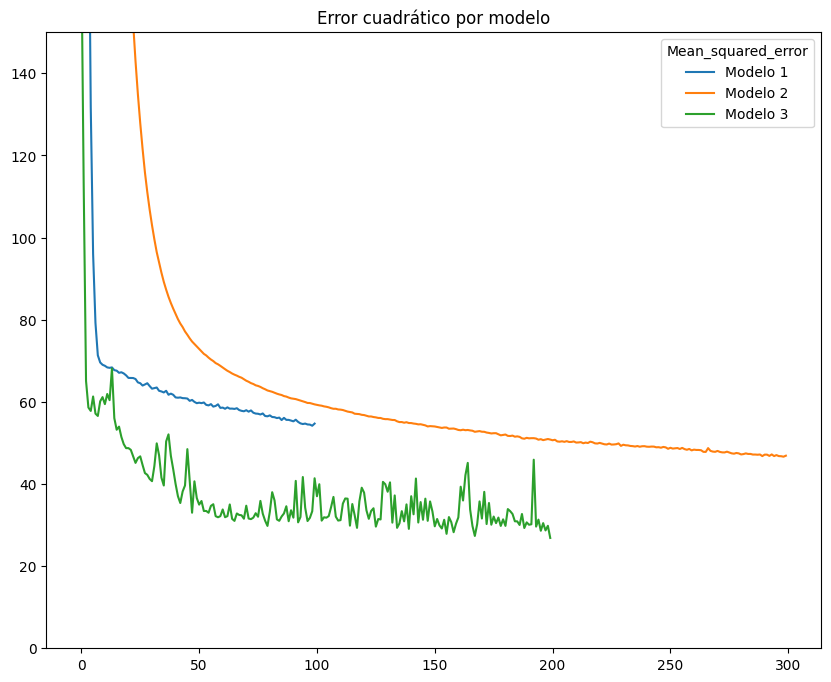

In [ ]:
print("Y el error gráficamente se ve:\n")

plt.figure(figsize = (10,8))

plt.plot(hist_neura.history["val_mean_squared_error"], label = "Modelo 1")
plt.plot(hist_neura2.history["val_mean_squared_error"], label = "Modelo 2")
plt.plot(hist_neura3.history["val_mean_squared_error"], label = "Modelo 3")

plt.ylim(0,150)
plt.legend(title = "Mean_squared_error", loc = "upper right")
plt.title("Error cuadrático medio por modelo")

plt.show()

Entre los tres modelos entrenados, he decidio quedarme con el 3. Esta decisión esta fundamentada principalmente por que es el modelo que ofrece un menor error.

Además guarda el mejor modelo en formato *.h5* usando la función `save`:

In [ ]:
# guardamos el modelo

tf.keras.models.save_model(neura3, "best_neuron.h5")

## <font color="#004D7F" size=4>Ejercicio 6 (Opcional)</font>
Carga el mejor modelo que has guardado en el ejercicio anterior usando la función `load_model` y realizar predicciones usando la función `predict`.

Para realizar las predicciones usa 10 datos cualquier del conjunto de test:

In [ ]:
# cargamos el modelo

model = tf.keras.models.load_model("best_neuron.h5")

In [ ]:
# hacemos las predicciones de 10 elementos aleatorios de nuestro conjunto de test

index = np.random.randint(len(x_test), size = 10)

for i in index:
  predict = model.predict(x_test[i].reshape(1,13),
                          verbose = 0)
  
  print(f"Para el índice {i}, la predicción es de: {predict[0][0]}")

Para el índice 48, la predicción es de: 24.222736358642578
Para el índice 37, la predicción es de: 13.213401794433594
Para el índice 11, la predicción es de: 18.73687171936035
Para el índice 45, la predicción es de: 21.637712478637695
Para el índice 29, la predicción es de: 23.958038330078125
Para el índice 72, la predicción es de: 19.48365020751953
Para el índice 17, la predicción es de: 21.730911254882812
Para el índice 100, la predicción es de: 29.47441864013672
Para el índice 68, la predicción es de: 15.443258285522461
Para el índice 8, la predicción es de: 18.914682388305664
